In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
import requests
requests.__version__

'2.26.0'

In [7]:
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99647f341df01803d93e9545399c293c


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=99647f341df01803d93e9545399c293c&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03n"}],"base":"stations","main":{"temp":29.91,"feels_like":24.62,"temp_min":27.09,"temp_max":32.11,"pressure":1027,"humidity":44},"visibility":10000,"wind":{"speed":5.01,"deg":263,"gust":8.01},"clouds":{"all":40},"dt":1641331817,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1641298409,"sunset":1641331474},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 29.91,
  'feels_like': 24.62,
  'temp_min': 27.09,
  'temp_max': 32.11,
  'pressure': 1027,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 263, 'gust': 8.01},
 'clouds': {'all': 40},
 'dt': 1641331817,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641298409,
  'sunset': 1641331474},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 29.91,
  'feels_like': 24.62,
  'temp_min': 27.09,
  'temp_max': 32.11,
  'pressure': 1027,
  'humidity': 44},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 263, 'gust': 8.01},
 'clouds': {'all': 40},
 'dt': 1641331817,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1641298409,
  'sunset': 1641331474},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 32.11 44 40 5.01


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-01-04 21:30:17'

In [20]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [24]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Processing Record 15 of Set 14 | dingle
Processing Record 16 of Set 14 | norsup
Processing Record 17 of Set 14 | mataura
Processing Record 18 of Set 14 | nelson bay
Processing Record 19 of Set 14 | ushuaia
Processing Record 20 of Set 14 | carballo
Processing Record 21 of Set 14 | ahipara
Processing Record 22 of Set 14 | buariki
City not found. Skipping...
Processing Record 23 of Set 14 | stryn
Processing Record 24 of Set 14 | jumla
Processing Record 25 of Set 14 | albany
Processing Record 26 of Set 14 | flinders
Processing Record 27 of Set 14 | hobart
Processing Record 28 of Set 14 | amderma
City not found. Skipping...
Processing Record 29 of Set 14 | bluff
Processing Record 30 of Set 14 | ilulissat
Processing Record 31 of Set 14 | vaini
Processing Record 32 of Set 14 | ancud
Processing Record 33 of Set 14 | quatre cocos
Processing Record 34 of Set 14 | busselton
Processing Record 35 of Set 14 | nizhneyansk
City not found. Skipping...
Processing Record 36 of Set 14 | rikitea
Processing

Processing Record 32 of Set 17 | khalkoutsion
Processing Record 33 of Set 17 | labuhan
Processing Record 34 of Set 17 | sobolevo
Processing Record 35 of Set 17 | kondinskoye
Processing Record 36 of Set 17 | port lincoln
Processing Record 37 of Set 17 | tura
Processing Record 38 of Set 17 | sitka
Processing Record 39 of Set 17 | hambantota
Processing Record 40 of Set 17 | sumbe
Processing Record 41 of Set 17 | papantla
City not found. Skipping...
Processing Record 42 of Set 17 | maua
Processing Record 43 of Set 17 | tsentralnyy
City not found. Skipping...
Processing Record 44 of Set 17 | san quintin
Processing Record 45 of Set 17 | puerto ayora
Processing Record 46 of Set 17 | san jose
Processing Record 47 of Set 17 | ende
Processing Record 48 of Set 17 | airai
Processing Record 49 of Set 17 | port hardy
Processing Record 50 of Set 17 | nanortalik
Processing Record 1 of Set 18 | jacareacanga
Processing Record 2 of Set 18 | berdychiv
Processing Record 3 of Set 18 | biltine
Processing Rec

Processing Record 20 of Set 21 | tukrah
Processing Record 21 of Set 21 | palmer
Processing Record 22 of Set 21 | praia
Processing Record 23 of Set 21 | awassa
Processing Record 24 of Set 21 | provideniya
Processing Record 25 of Set 21 | altay
Processing Record 26 of Set 21 | uvaly
Processing Record 27 of Set 21 | mitu
Processing Record 28 of Set 21 | yulara
Processing Record 29 of Set 21 | sento se
City not found. Skipping...
Processing Record 30 of Set 21 | mount gambier
Processing Record 31 of Set 21 | vila franca do campo
Processing Record 32 of Set 21 | banjarmasin
Processing Record 33 of Set 21 | isangel
Processing Record 34 of Set 21 | mlimba
Processing Record 35 of Set 21 | la ronge
Processing Record 36 of Set 21 | yatou
Processing Record 37 of Set 21 | aklavik
Processing Record 38 of Set 21 | meulaboh
Processing Record 39 of Set 21 | anloga
Processing Record 40 of Set 21 | norman wells
Processing Record 41 of Set 21 | abonnema
Processing Record 42 of Set 21 | prince rupert
Proc

Processing Record 1 of Set 25 | leningradskiy
Processing Record 2 of Set 25 | lemesos
City not found. Skipping...
Processing Record 3 of Set 25 | port shepstone
Processing Record 4 of Set 25 | kinkala
Processing Record 5 of Set 25 | alofi
Processing Record 6 of Set 25 | ust-maya
Processing Record 7 of Set 25 | santa cruz
Processing Record 8 of Set 25 | tubruq
City not found. Skipping...
Processing Record 9 of Set 25 | kilinochchi
Processing Record 10 of Set 25 | ilhabela
Processing Record 11 of Set 25 | esperanca
Processing Record 12 of Set 25 | tokuyama
Processing Record 13 of Set 25 | grindavik
Processing Record 14 of Set 25 | warqla
City not found. Skipping...
Processing Record 15 of Set 25 | sola
Processing Record 16 of Set 25 | sahrak
City not found. Skipping...
Processing Record 17 of Set 25 | garissa
Processing Record 18 of Set 25 | lorengau
Processing Record 19 of Set 25 | centerville
Processing Record 20 of Set 25 | truth or consequences
Processing Record 21 of Set 25 | jardim

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,71.64,93,46,8.50,PH,2022-01-04 21:34:45
1,Norsup,-16.0667,167.3833,82.92,78,100,9.33,VU,2022-01-04 21:34:45
2,Mataura,-46.1927,168.8643,54.48,97,94,4.72,NZ,2022-01-04 21:34:46
3,Nelson Bay,-32.7167,152.1500,75.25,92,60,1.99,AU,2022-01-04 21:34:46
4,Ushuaia,-54.8000,-68.3000,47.82,57,75,24.16,AR,2022-01-04 21:34:46
5,Carballo,43.2130,-8.6910,52.75,93,75,2.93,ES,2022-01-04 21:34:47
6,Ahipara,-35.1667,173.1667,74.43,59,62,9.95,NZ,2022-01-04 21:34:47
7,Stryn,61.9045,6.7226,36.32,91,78,4.47,NO,2022-01-04 21:34:47
8,Jumla,29.2747,82.1838,36.32,71,85,4.29,NP,2022-01-04 21:34:48
9,Albany,42.6001,-73.9662,32.31,66,5,4.45,US,2022-01-04 21:33:40


In [27]:
column_order = ["City","Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
city_data_df = city_data_df[column_order]

In [29]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2022-01-04 21:34:45,10.9995,122.6711,71.64,93,46,8.50
1,Norsup,VU,2022-01-04 21:34:45,-16.0667,167.3833,82.92,78,100,9.33
2,Mataura,NZ,2022-01-04 21:34:46,-46.1927,168.8643,54.48,97,94,4.72
3,Nelson Bay,AU,2022-01-04 21:34:46,-32.7167,152.1500,75.25,92,60,1.99
4,Ushuaia,AR,2022-01-04 21:34:46,-54.8000,-68.3000,47.82,57,75,24.16
...,...,...,...,...,...,...,...,...,...
550,Yinchuan,CN,2022-01-04 21:37:50,38.4681,106.2731,24.31,37,0,5.66
551,Turinskaya Sloboda,RU,2022-01-04 21:37:50,57.6232,64.3858,0.70,90,56,11.23
552,Sigli,ID,2022-01-04 21:37:50,5.3848,95.9609,75.92,85,100,2.89
553,Jalu,LY,2022-01-04 21:37:51,29.0331,21.5482,55.71,68,0,5.50


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

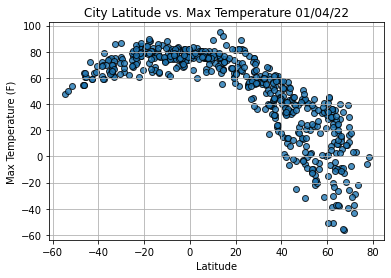

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

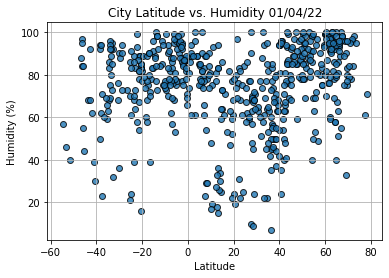

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

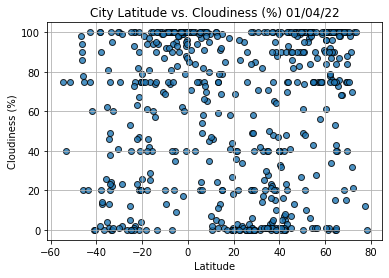

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()